## Volatility
### Microstructure noise determination

In [1]:
#Set up dependencies
import pandas as pd
import numpy as np
import io
import requests
from datetime import datetime, timedelta

In [2]:
#Load in dataframes
spx_2019_df = pd.read_csv("FinalProject- SR/Resources/SPX_2004_2019.csv")
spx_2019_df.columns = ["Date", "Open", "High", "Low", "Close"]

spx_2020_df = pd.read_csv("FinalProject- SR/Resources/SPX_2020_2020.csv")
spx_2020_df.columns = ["Date", "Open", "High", "Low", "Close"]

spx_df = pd.concat([spx_2019_df, spx_2020_df], ignore_index=True)

spx_df_dates = []
for row, index in spx_df.iterrows():
    try:
        spx_df_date = (datetime.strptime(index['Date'], '%Y-%m-%d %H:%M:%S')).strftime('%Y%m%d %H%M')
        spx_df_dates.append(spx_df_date)
    except ValueError:
        try:
            spx_df_date = (datetime.strptime(index['Date'], '%Y.%m.%d %H:%M:%S')).strftime('%Y%m%d %H%M')
            spx_df_dates.append(spx_df_date)
        except ValueError:
            spx_df.dates.append("Date Error")
    

spx_df['Date2'] = spx_df_dates

In [3]:
#SPX Full Data 
spx_df = spx_df.drop(columns=['Date'])
spx_df = spx_df.rename(columns={"Date2": "Date"})
spx_df.head()

,Open,High,Low,Close,Date
0,1114.75,1114.75,1114.65,1114.65,20040906 0932
1,1114.65,1114.65,1114.65,1114.65,20040906 0933
2,1114.65,1114.65,1114.65,1114.65,20040906 0934
3,1114.65,1114.65,1114.65,1114.65,20040906 0935
4,1114.65,1114.65,1114.65,1114.65,20040906 0936


In [212]:
#Twitter Data
tweet_df = pd.read_csv("FinalProject- SR/Resources/FinalTrumpTweet3.csv")
tweet_df = tweet_df[~tweet_df['favorite_count'].isin(['0.0'])]
tweet_df.head(870)
tweet_df.shape

(11324, 7)

In [213]:
# tweet_df.loc[tweet_df['text'] == "Congress has agreed to provide $8 Billion" ]

# df[df['A'].str.contains("hello")]
tweet_df['text'] = tweet_df['text'].astype('str')
print(tweet_df.dtypes)
tweet_df.shape


Unnamed: 0          int64
source             object
text               object
created_at         object
retweet_count     float64
favorite_count    float64
is_retweet         object
dtype: object


(11324, 7)

In [214]:
tweet_df = tweet_df.drop(columns=['Unnamed: 0','source'])

#Adjust Tweet time
adjusted_times = []

for row, index in tweet_df.iterrows():
    try:
        adjusted_time = (datetime.strptime(str(index['created_at']), '%m/%d/%Y %H:%M') +
                         timedelta(minutes= -60 * 5)).strftime('%Y%m%d %H%M')
        adjusted_times.append(adjusted_time)
    except ValueError:
        adjusted_times.append("No Date")
        
tweet_df['Adjusted T_0'] = adjusted_times
# tweet_df = tweet_df.drop(tweet_df['Adjusted T_0'] == "No Date")
tweet_df = tweet_df.drop(columns=['created_at'])
tweet_df = tweet_df.rename(columns={"Adjusted T_0": "Date T_0"}) 
tweet_df.head(867)

,text,retweet_count,favorite_count,is_retweet,Date T_0
3,Great job being done by @BankofAmerica and man...,16337.0,96640.0,False,20200403 1349
4,The Paycheck Protection Program is now availab...,13350.0,45408.0,False,20200403 1251
5,Thank you @DeptofDefense @USACEHQ @USNationalG...,9359.0,34347.0,False,20200403 1233
6,Thank you @USNationalGuard keep up the great w...,12122.0,51941.0,False,20200403 1229
7,GREAT news this week regarding the Keystone XL...,26180.0,135667.0,False,20200403 1214
...,...,...,...,...,...
1905,No matter what you give to the Democrats in th...,37413.0,193964.0,False,20200131 1913
1906,Democrats = 17 Witnesses. Republicans = 0 Witn...,34893.0,164468.0,False,20200131 1805
1907,The Radical Left Do Nothing Democrats keep cha...,44015.0,183007.0,False,20200131 1606
1917,Incredible numbers! https://t.co/wWpSA87qfw,26277.0,114201.0,False,20200131 0933


In [215]:
tweet_df = tweet_df[~tweet_df['Date T_0'].isin(['No Date'])]

In [216]:
tweet_df.shape

(11322, 5)

In [217]:
#Create arrays of time 5 prior to +6 minutes after Tweet
neg_time = [-5, -4, -3, -2, -1, 0]
pos_time = [1, 2, 3, 4, 5, 6]

#Call out Arrays
t_list_sub_5 = []
t_list_sub_4 = []
t_list_sub_3 = []
t_list_sub_2 = []
t_list_sub_1 = []
t_list_sub_0 = []
t_list_plus_1 = []
t_list_plus_2 = []
t_list_plus_3 = []
t_list_plus_4 = []
t_list_plus_5 = []
t_list_plus_6 = []


#Subract or add time from t_0 of tweet
#e.g. variables def: t_sub_5 = Time, 5 minutes prior to tweet
#e.g. variables def: t_plus_3 = Time, 3 minutes after tweet

for row, index in tweet_df.iterrows():
    t_sub_5 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -5)).strftime('%Y%m%d %H%M')
    t_list_sub_5.append(t_sub_5)
    t_sub_4 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -4)).strftime('%Y%m%d %H%M')
    t_list_sub_4.append(t_sub_4)
    t_sub_3 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -3)).strftime('%Y%m%d %H%M')
    t_list_sub_3.append(t_sub_3)
    t_sub_2 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -2)).strftime('%Y%m%d %H%M')
    t_list_sub_2.append(t_sub_2)
    t_sub_1 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= -1)).strftime('%Y%m%d %H%M')
    t_list_sub_1.append(t_sub_1)
    t_sub_0 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M')).strftime('%Y%m%d %H%M')
    t_list_sub_0.append(t_sub_0)
               
    t_plus_1 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 1)).strftime('%Y%m%d %H%M')
    t_list_plus_1.append(t_plus_1)
    t_plus_2 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 2)).strftime('%Y%m%d %H%M')
    t_list_plus_2.append(t_plus_2) 
    t_plus_3 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 3)).strftime('%Y%m%d %H%M')
    t_list_plus_3.append(t_plus_3)
    t_plus_4 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 4)).strftime('%Y%m%d %H%M')
    t_list_plus_4.append(t_plus_4)
    t_plus_5 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 5)).strftime('%Y%m%d %H%M')
    t_list_plus_5.append(t_plus_5)
    t_plus_6 = (datetime.strptime(index['Date T_0'], '%Y%m%d %H%M') + timedelta(minutes= 6)).strftime('%Y%m%d %H%M')
    t_list_plus_6.append(t_plus_6) 
        

In [218]:
dictionary = {'Modified_Time': t_list_sub_0[:870],
              "Tweet_Time": tweet_df['Date T_0'][:870]}

test_df = pd.DataFrame.from_dict(dictionary, orient = 'index')
test_df

,0,1,2,3,4,5,6,7,8,9,...,860,861,862,863,864,865,866,867,868,869
Modified_Time,20200403 1349,20200403 1251,20200403 1233,20200403 1229,20200403 1214,20200403 1212,20200402 1952,20200402 1915,20200402 1913,20200402 1148,...,20200201 0842,20200201 0814,20200131 1913,20200131 1805,20200131 1606,20200131 0933,20200131 0925,20200130 2322,20200130 2216,20200130 2207
Tweet_Time,20200403 1349,20200403 1251,20200403 1233,20200403 1229,20200403 1214,20200403 1212,20200402 1952,20200402 1915,20200402 1913,20200402 1148,...,20200201 0842,20200201 0814,20200131 1913,20200131 1805,20200131 1606,20200131 0933,20200131 0925,20200130 2322,20200130 2216,20200130 2207


In [219]:
#NOTE: This cell will take about 4h30m minutes to run

#Matching each time calculated above with an associated stock value.
#Output is 12 arrays that represent the volatility of the stock leading up to and after the tweet.

#Dimension arrays
vol_sub_54_list = []
vol_sub_43_list = []
vol_sub_32_list = []
vol_sub_21_list = []
vol_sub_10_list = []
vol_sub_01_list = []
vol_plus_01_list = []
vol_plus_12_list = []
vol_plus_23_list = []
vol_plus_34_list = []
vol_plus_45_list = []
vol_plus_56_list = []


#Logmaritmic volatility equation taken from: https://quant.stackexchange.com/questions/2589/how-to-calculate-historical-intraday-volatility
#Volatility delta_t is 1 minute

for t_sub_5, t_sub_4 in zip(t_list_sub_5, t_list_sub_4):
    try:
        spx_sub_5 = spx_df.loc[spx_df['Date'] == t_sub_5, 'Close'].iloc[0]
        spx_sub_4 = spx_df.loc[spx_df['Date'] == t_sub_4, 'Close'].iloc[0]
        vol_sub_54 = np.log(spx_sub_4 / spx_sub_5)
        print(vol_sub_54)               #--Un-comment if you want to track progress
        vol_sub_54_list.append(vol_sub_54)
    except IndexError:
        vol_sub_54_list.append("No SPX data avail.")
        print("No SPX data avail.")     #--Un-comment if you want to track progress
print(f'Vol List 1 of 11 Complete')

for t_sub_4, t_sub_3 in zip(t_list_sub_4, t_list_sub_3):
    try:
        spx_sub_4 = spx_df.loc[spx_df['Date'] == t_sub_4, 'Close'].iloc[0]
        spx_sub_3 = spx_df.loc[spx_df['Date'] == t_sub_3, 'Close'].iloc[0]
        vol_sub_43 = np.log(spx_sub_3 / spx_sub_4)
        vol_sub_43_list.append(vol_sub_43)
    except IndexError:
        vol_sub_43_list.append("No SPX data avail.")
print(f'Vol List 2 of 11 Complete')

for t_sub_3, t_sub_2 in zip(t_list_sub_3, t_list_sub_2):
    try:
        spx_sub_3 = spx_df.loc[spx_df['Date'] == t_sub_3, 'Close'].iloc[0]
        spx_sub_2 = spx_df.loc[spx_df['Date'] == t_sub_2, 'Close'].iloc[0]
        vol_sub_32 = np.log(spx_sub_2 / spx_sub_3)
        vol_sub_32_list.append(vol_sub_32)
    except IndexError:
        vol_sub_32_list.append("No SPX data avail.")
print(f'Vol List 3 of 11 Complete')

for t_sub_2, t_sub_1 in zip(t_list_sub_2, t_list_sub_1):
    try:
        spx_sub_2 = spx_df.loc[spx_df['Date'] == t_sub_2, 'Close'].iloc[0]
        spx_sub_1 = spx_df.loc[spx_df['Date'] == t_sub_1, 'Close'].iloc[0]
        vol_sub_21 = np.log(spx_sub_1 / spx_sub_2)
        vol_sub_21_list.append(vol_sub_21)
    except IndexError:
        vol_sub_21_list.append("No SPX data avail.")
print(f'Vol List 4 of 11 Complete')

for t_sub_1, t_sub_0 in zip(t_list_sub_1, t_list_sub_0):
    try:
        spx_sub_1 = spx_df.loc[spx_df['Date'] == t_sub_1, 'Close'].iloc[0]
        spx_sub_0 = spx_df.loc[spx_df['Date'] == t_sub_0, 'Close'].iloc[0]
        vol_sub_10 = np.log(spx_sub_0 / spx_sub_1)
        vol_sub_10_list.append(vol_sub_10)
    except IndexError:
        vol_sub_10_list.append("No SPX data avail.")
print(f'Vol List 5 of 11 Complete')

# t_sub_0_test = []
# t_plus_1_test = []
# count = -1
for t_sub_0, t_plus_1 in zip(t_list_sub_0, t_list_plus_1):
#     count = count + 1
#     print([count, t_sub_0, t_plus_1])
    try:
        spx_sub_0 = spx_df.loc[spx_df['Date'] == t_sub_0, 'Close'].iloc[0]
        spx_plus_1 = spx_df.loc[spx_df['Date'] == t_plus_1, 'Close'].iloc[0]
        vol_plus_01 = np.log(spx_plus_1 / spx_sub_0)
#         t_sub_0_test.append(t_sub_0)
#         t_plus_1_test.append(t_plus_1)
        
        vol_plus_01_list.append(vol_plus_01)
    except IndexError:
#         t_sub_0_test.append(t_sub_0)
        vol_plus_01_list.append("No SPX data avail.")
#         print("Error Detected")
print(f'Vol List 6 of 11 Complete')


for t_plus_1, t_plus_2 in zip(t_list_plus_1, t_list_plus_2):
    try:
        spx_plus_1 = spx_df.loc[spx_df['Date'] == t_plus_1, 'Close'].iloc[0]
        spx_plus_2 = spx_df.loc[spx_df['Date'] == t_plus_2, 'Close'].iloc[0]
        vol_plus_12 = np.log(spx_plus_2 / spx_plus_1)
        vol_plus_12_list.append(vol_plus_12)
    except IndexError:
        vol_plus_12_list.append("No SPX data avail.")
print(f'Vol List 7 of 11 Complete')

for t_plus_2, t_plus_3 in zip(t_list_plus_2, t_list_plus_3):
    try:
        spx_plus_2 = spx_df.loc[spx_df['Date'] == t_plus_2, 'Close'].iloc[0]
        spx_plus_3 = spx_df.loc[spx_df['Date'] == t_plus_3, 'Close'].iloc[0]
        vol_plus_23 = np.log(spx_plus_3 / spx_plus_2)
        vol_plus_23_list.append(vol_plus_23)
    except IndexError:
        vol_plus_23_list.append("No SPX data avail.")
print(f'Vol List 8 of 11 Complete')

for t_plus_3, t_plus_4 in zip(t_list_plus_3, t_list_plus_4):
    try:
        spx_plus_3 = spx_df.loc[spx_df['Date'] == t_plus_3, 'Close'].iloc[0]
        spx_plus_4 = spx_df.loc[spx_df['Date'] == t_plus_4, 'Close'].iloc[0]
        vol_plus_34 = np.log(spx_plus_4 / spx_plus_3)
        vol_plus_34_list.append(vol_plus_34)
    except IndexError:
        vol_plus_34_list.append("No SPX data avail.")
print(f'Vol List 9 of 11 Complete')

for t_plus_4, t_plus_5 in zip(t_list_plus_4, t_list_plus_5):
    try:
        spx_plus_4 = spx_df.loc[spx_df['Date'] == t_plus_4, 'Close'].iloc[0]
        spx_plus_5 = spx_df.loc[spx_df['Date'] == t_plus_5, 'Close'].iloc[0]
        vol_plus_45 = np.log(spx_plus_5 / spx_plus_4)
        vol_plus_45_list.append(vol_plus_45)
    except IndexError:
        vol_plus_45_list.append("No SPX data avail.")
print(f'Vol List 10 of 11 Complete')

for t_plus_5, t_plus_6 in zip(t_list_plus_5, t_list_plus_6):
    try:
        spx_plus_5 = spx_df.loc[spx_df['Date'] == t_plus_5, 'Close'].iloc[0]
        spx_plus_6 = spx_df.loc[spx_df['Date'] == t_plus_6, 'Close'].iloc[0]
        vol_plus_56 = np.log(spx_plus_6 / spx_plus_5)
        vol_plus_56_list.append(vol_plus_56)
    except IndexError:
        vol_plus_56_list.append("No SPX data avail.")
print('Vol List 11 of 11 Complete')

0.0014819016397240436
-0.0012576640550980404
0.0006663987855638192
-0.0005010222574845985
0.00035467567699721804
-0.00025415677575558055
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00041472431397267316
0.0009145171072867401
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0008544112002384455
0.0005467697816436023
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0006919144853308378
-0.00031066151736182314
-0.0003375488614841741
0.0013700814021817653
0.00014978655444043053
0.00103474482003119
-0.0016120420324374429
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00027833328111571997
1.5349253067502207e-05
-0.0007057857365588468
-0.00013096921086649442
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX da

-0.002103810430034662
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0003629854762413281
-0.0003629854762413281
0.00124357184483518
-0.0012922983167019053
0.001586387461250919
-0.0008201189796808679
0.0007935222553011395
0.00025353641172195764
0.00025353641172195764
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail

No SPX data avail.
0.00018143769433238087
6.462761417089734e-05
-0.0001786561366973511
-0.0001786561366973511
0.00034501985746672725
-2.4605618078928566e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00024144734043859563
0.00039425850114840514
-0.0004836729852730437
-0.00016826647330235188
-0.0006360973198695018
-0.0

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00011177520775419173
-9.315236939783306e-05
-9.315236939783306e-05
-3.108263941606437e-05
-8.083144471950939e-05
-2.7962772231118702e-05
-8.701218797625744e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No

0.00017498341679079293
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-4.5026935763934634e-05
-9.325253597378087e-05
-3.2169701609506573e-06
3.859960628874141e-05
3.859960628874141e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-9.623296075149545e-06
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-6.4958475295014525e-06
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-3.202244132963382e-05
4.16303068693461e-05
-7.697365259821468e-05
9.944232112993784e-05
9.949785686622019e-05
0.0002407924974271584
1.2816610327125848e-05
-0.00017976200842588003
0.0004816429898461532
-0.00023436760183882815
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.


7.789754529305106e-05
7.789754529305106e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00017110218364765323
0.0001475445570472306
-0.00043598266150386494
-6.032151368606525e-05
7.707813548459403e-05
-0.00034511354745651217
0.00012063211241464487
0.00014747779480383426
0.0001273825568072542
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0004081674359467727
0.00015674568725880126
0.00015674568725880126
6.846993656363458e-06
6.846993656363458e-06
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00010962696012004611
-0.00014053681659262427
1.3740746466201599e-05
0.0004157697039378679
No SPX data avail.
No SPX data avail.
No SPX data avail.


No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0007814926907367811
-0.000333776146115122
0.00022341935071216676
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00029530188195800753
1.990881761591201e-05
1.990881761591201e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-3.673775422524484e-05
0.0001

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00010772024021600605
-7.304131881084062e-05
-0.00028425044735524833
-0.00029720044315010294
0.0005251139306944095
-0.0004563794666966664
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00013943209331081203
1.0459795162402998e-05
8.003939334419277e-05
0.00010819772271820956
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX da

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
3.64225747156348e-05
0.00013904890571056995
0.00013904890571056995
-1.656065090023365e-05
-4.63808063054834e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data av

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
8.433367128012474e-05
0.0
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0004455666195798415
-0.00014162347736283956
-0.00014162347736283956
-0.00014162347736283956
0.00030323348199515047
0.00030323348199515047
3.3711520406361557e-06
0.00018184818420835102
0.00011110381653044074
-0.0003024650927934525
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
N

No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0004771548745080367
-0.0003480413737916783
-0.00042681320038685425
0.00011089865484148581
0.0003328197918926319
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0001934970658983377
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-1.0639524058807835e-05
0.00018437820276397015
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
6.145358208054718e-05
2.7312516645132917e-05
0.0
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
3.414542536984284e-05
-8.194874110836858e-05
7.855365645691784e-05
-0.0008202548718227897
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-6.823470007462533e-06
-2.7297884756873752e-05
8.874840856041897e-05
-0.0003785353455683124
-5.791423584633166e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0002899722499818897
-1

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00026926292979035347
-0.00013806507134938347
-0.00013806507134938347
-0.0003005811848202984
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-3.56280784894728e-06
7.12463842462832e-06
1.0673934430118268e-05
-7.122050580872663e-06
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.


No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00012022933760595372
-0.0003635075898813043
No SPX data avail.
No SPX data avail.
-0.001394901256433022
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0001556305031336374
-0.00012548220355604808
5.7072087769475e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-6.431172272517521e-05
0.0001248234034154346
-0.00040799828300028187
0.00021142926259745394
0.00021147397438411755
7.91862668802345e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX

0.0007790990076702038
0.0002451724611943152
0.0008604650816030288
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00026664432091315615
0.0004263954044357698
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0009485578838245965
-0.0010995638997523642
-0.0002330029962700048
-0.0002330029962700048
-0.0005929261830523996
0.0004146044473891579
0.00049862

0.0010929491007935525
-0.0005499957402488029
-0.0005863796790767493
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00020188198944764253
-0.0008417885149712783
-0.0007786348949840103
0.0014856390979437514
0.0005068404657961166
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.0007186781055390715
-0.00021314282855070527
-3.3069086836801765e-05
-0.0002059906502242059
-0.00023168877314114303
4.4363440096147685e-05
4.4363440096147685e-05
0.0003584686406046495
0.0004298525227382549
0.00034204685631798244
No SPX data avail.


No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
4.1331849985057424e-05
-0.0001583760263322536
-0.00017216800885459988
0.00015139524510223074
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00012440217858084767
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX da

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-4.195158787368317e-05
-0.0001085390470286794
2.4476251917750136e-05
-0.00011538280004897325
No SPX data avail.
0.0001294423659674144
-0.0002799395348888729
-9.106096537928922e-05
0.00026606265932544853
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
8.738127075406332e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-6.669861181595507e-05
-0.00011222675427464468
1.0553848372849092e-05
-0.00024299154403325594
No SPX data avail.
No SPX data avai

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00010998801141754543
-0.00013608669847088023
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-3.6957305072912593e-06
-6.569151268031647e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data 

3.683702563531969e-05
1.4741000619273428e-05
0.0002541094857275968
0.0003609403640486003
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
3.309961328935193e-05
0.0001577417257647472
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
4.4038798188345145e-05
4.4038798188345145e-05
-6.238978571138745e-05
7.345568605401199e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00017387411927557116
0.0002437259055771468
0.00036196555074170783
-0.00013672686981431047
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
7.692744463636145e-05
-0.00030015850058261184
0.00025571990772680736
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX 

0.000403157710948547
No SPX data avail.
No SPX data avail.
0.00018161147543868788
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.000584287024171342
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-7.862927729460341e-05
0.0001965489582977203
-0.0003363678034692019
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00026490730189333405
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00015102806993260828
0.000147434019048780

No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0004911501442065157
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
7.06223876979055e-05
0.00014500216599144434
-0.0003947829117725213
-4.84531337159148e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data av

-1.164892470735235e-05
-0.00018633034094130236
-9.310336808166921e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
7.362215177637755e-05
7.362215177637755e-05
-8.528090371926904e-05
0.00010436012756864977
-0.0002048526903741687
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
8.92335805954534e-05
-0.00010866148465550026
-5.045066023526665e-05
0.00010094108155292497
0.00019029532727074484
-7.76427656359932e-06
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avai

3.59047089064106e-05
1.993918548503632e-05
-0.0001276532938276917
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-7.580397096745881e-05
-4.78589119366859e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-1.2006171172245174e-05
4.005166664993239e-06
3.203485392391219e-05
7.207207210347317e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-4.806960479696796e-05
-0.00011615867287752991
1.6023265782308863e-05
0.0
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00014043056032818433

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00019211942529556069
-4.084775429149007e-06
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.00010222670211249589
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00032230991842455647
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
9.616570612896614e-05
-1.671262638956726e-05
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
2.092457319172282e-05
0.000364294915415333
0.000364294915415333
-0.0003098684758748159
-0.00017582859269394508
-0.00017582859269394508
-0.00017582859269394508
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
-0.0004268514747246355
3.756111506867549e-05
0.00022177820178562765
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
5.4462009619825235e-05
No SPX data avail.
No SPX data avail

No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
0.00021955342920874747
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
No SPX data avail.
4.796842806212414e-05
0.00018742712735609948
-0.0001569680747599161
No SPX data avail.
No SPX data avail.
No SPX data avai

In [220]:
dictionary = {'Modified_Time': t_list_sub_0[:870],
              "Tweet_Time": tweet_df['Date T_0'][:870]}

test_df = pd.DataFrame.from_dict(dictionary)
test_df

,Modified_Time,Tweet_Time
3,20200403 1349,20200403 1349
4,20200403 1251,20200403 1251
5,20200403 1233,20200403 1233
6,20200403 1229,20200403 1229
7,20200403 1214,20200403 1214
...,...,...
1917,20200131 0933,20200131 0933
1920,20200131 0925,20200131 0925
1921,20200130 2322,20200130 2322
1922,20200130 2216,20200130 2216


In [138]:
print(len(vol_sub_54_list))
print(len(vol_sub_43_list))
print(len(vol_sub_32_list))
print(len(vol_sub_21_list))
print(len(vol_sub_10_list))
print(len(vol_sub_10_list))
print(len(vol_plus_01_list))
print(len(vol_plus_12_list))
print(len(vol_plus_23_list))
print(len(vol_plus_34_list))
print(len(vol_plus_45_list))
print(len(vol_plus_56_list))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [222]:
#Sort each time series into a dictionary

# test_MVI = {"Vol List": vol_plus_01_list,
#             "Time List" : t_sub_0_test,
#             "Tweet Time": tweet_df['Date T_0'][:870],
#             "Tweet": tweet_df['text'][:870]}
# test_df_MVI = pd.DataFrame.from_dict(test_MVI)
# test_df_MVI

Moving_Volatility_Index = ({"Vol -5 Mins Before Tweet" : vol_sub_54_list,
                            "Vol -4 Mins Before Tweet" : vol_sub_43_list,
                            "Vol -3 Mins Before Tweet" : vol_sub_32_list,
                            "Vol -2 Mins Before Tweet" : vol_sub_21_list,
                            "Vol -1 Mins Before Tweet" : vol_sub_10_list,
                            "Vol @ Tweet" : vol_sub_10_list,
                            "Tweet Time": tweet_df['Date T_0'],
                            "Vol 1 Mins After Tweet" : vol_plus_01_list,
                            "Vol 2 Mins After Tweet" : vol_plus_12_list,
                            "Vol 3 Mins After Tweet" : vol_plus_23_list,
                            "Vol 4 Mins After Tweet" : vol_plus_34_list, 
                            "Vol 5 Mins After Tweet" : vol_plus_45_list,
                            "Vol 6 Mins After Tweet" : vol_plus_56_list,
                            "Tweet": tweet_df['text']})
# Dictionary to dataframe
df_MVI_nulls_incl = pd.DataFrame(Moving_Volatility_Index)
df_MVI_nulls_incl.head(1000)

,Vol -5 Mins Before Tweet,Vol -4 Mins Before Tweet,Vol -3 Mins Before Tweet,Vol -2 Mins Before Tweet,Vol -1 Mins Before Tweet,Vol @ Tweet,Tweet Time,Vol 1 Mins After Tweet,Vol 2 Mins After Tweet,Vol 3 Mins After Tweet,Vol 4 Mins After Tweet,Vol 5 Mins After Tweet,Vol 6 Mins After Tweet,Tweet
3,0.0014819,-0.000279207,0.000582604,-0.00049762,-0.00026307,-0.00026307,20200403 1349,0.000424925,-0.000586849,-0.00083027,-8.5091e-05,0.000554987,-0.00113461,Great job being done by @BankofAmerica and man...
4,-0.00125766,-0.000847396,-0.00014534,0.000633689,0.000580865,0.000580865,20200403 1251,-0.000649462,0.000169466,0.000504192,-2.41954e-05,-3.62942e-05,-3.22626e-05,The Paycheck Protection Program is now availab...
5,0.000666399,0.00188371,-0.000729667,-0.00125902,0.000548998,0.000548998,20200403 1233,0.000145273,0.00095182,-0.000391105,-8.46923e-05,0.000911074,0.000926347,Thank you @DeptofDefense @USACEHQ @USNationalG...
6,-0.000501022,-0.000630675,0.00101455,-4.04004e-05,0.000666399,0.000666399,20200403 1229,0.00188371,-0.000729667,-0.00125902,0.000548998,0.000145273,0.00095182,Thank you @USNationalGuard keep up the great w...
7,0.000354676,-0.000532061,-0.00112552,-0.000383529,8.07552e-05,8.07552e-05,20200403 1214,0.000734573,-0.00151413,-3.63674e-05,-0.000755933,0.000371974,5.65926e-05,GREAT news this week regarding the Keystone XL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,20200124 0737,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,After having been treated unbelievably unfairl...
2230,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,20200124 0735,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,....a foreign power engaged in clandestine int...
2231,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,20200124 0735,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,Frances Hakes former Federal prosecutor “This ...
2264,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,20200124 0642,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,No SPX data avail.,“He’s got to explain this. How did Hunter Bide...


In [193]:
# df_MVI_nulls_incl['Tweets'] = tweet_df['text']
# df_MVI_nulls_incl.shape

# test_df_MVI = pd.DataFrame(test_MVI)

# test_df_MVI['Tweets'] = tweet_df['text'][:40]
# tweet_df['text']

#Why are tweets showing up as NaN

In [194]:
# df_MVI_nulls_incl['Tweets'] = tweet_df['text']
# df_MVI_nulls_incl['Time'] = tweet_df['Date T_0']

# df_MVI_nulls_incl.shape
# df_MVI_nulls_incl.head(100)


In [223]:
df_MVI_nulls_incl.to_csv("df_MVI_nulls_incl")

In [224]:
#Remove non integer values from each colum
pd.set_option('display.max_rows', 300)
df_columns = list(df_MVI_nulls_incl.columns.values)

# for column in df_columns:
df_MVI_nulls_incl = df_MVI_nulls_incl[~df_MVI_nulls_incl['Vol @ Tweet'].isin(["No SPX data avail."])]
    
#Rename to df MVI
df_MVI = df_MVI_nulls_incl
df_MVI.head(300)


,Vol -5 Mins Before Tweet,Vol -4 Mins Before Tweet,Vol -3 Mins Before Tweet,Vol -2 Mins Before Tweet,Vol -1 Mins Before Tweet,Vol @ Tweet,Tweet Time,Vol 1 Mins After Tweet,Vol 2 Mins After Tweet,Vol 3 Mins After Tweet,Vol 4 Mins After Tweet,Vol 5 Mins After Tweet,Vol 6 Mins After Tweet,Tweet
3,0.0014819,-0.000279207,0.000582604,-0.00049762,-0.00026307,-0.00026307,20200403 1349,0.000424925,-0.000586849,-0.00083027,-8.5091e-05,0.000554987,-0.00113461,Great job being done by @BankofAmerica and man...
4,-0.00125766,-0.000847396,-0.00014534,0.000633689,0.000580865,0.000580865,20200403 1251,-0.000649462,0.000169466,0.000504192,-2.41954e-05,-3.62942e-05,-3.22626e-05,The Paycheck Protection Program is now availab...
5,0.000666399,0.00188371,-0.000729667,-0.00125902,0.000548998,0.000548998,20200403 1233,0.000145273,0.00095182,-0.000391105,-8.46923e-05,0.000911074,0.000926347,Thank you @DeptofDefense @USACEHQ @USNationalG...
6,-0.000501022,-0.000630675,0.00101455,-4.04004e-05,0.000666399,0.000666399,20200403 1229,0.00188371,-0.000729667,-0.00125902,0.000548998,0.000145273,0.00095182,Thank you @USNationalGuard keep up the great w...
7,0.000354676,-0.000532061,-0.00112552,-0.000383529,8.07552e-05,8.07552e-05,20200403 1214,0.000734573,-0.00151413,-3.63674e-05,-0.000755933,0.000371974,5.65926e-05,GREAT news this week regarding the Keystone XL...
8,-0.000254157,0.000899344,0.000354676,-0.000532061,-0.00112552,-0.00112552,20200403 1212,-0.000383529,8.07552e-05,0.000734573,-0.00151413,-3.63674e-05,-0.000755933,Highly respected Justice Daniel Kelly is runni...
16,0.000414724,0.000227228,0.000697307,0.00131758,0.00013922,0.00013922,20200402 1148,0.000552709,9.54009e-05,-0.00116531,0.000202933,0,-0.000644753,30 DAYS TO SLOW THE SPREAD https://t.co/GIzwKS...
17,0.000914517,7.71876e-05,0.00127476,-0.00213229,-0.000630403,-0.000630403,20200402 0954,0.0022473,0.000519451,0.00126908,0.00181366,-0.000133483,-0.000696018,.....Could be as high as 15 Million Barrels. G...
18,No SPX data avail.,No SPX data avail.,No SPX data avail.,0.00114139,0.000800624,0.000800624,20200402 0932,0.000492995,0.00254193,0.00142952,-0.00143355,-0.00120964,0.00160045,Just spoke to my friend MBS (Crown Prince) of ...
33,-0.000854411,-0.000899324,0.0005421,-0.000847412,0.00105614,0.00105614,20200401 1205,-0.000285008,-0.000847476,-0.000108497,-0.000619058,0.000739609,0.000538284,Upon information and belief Iran or its proxie...


In [225]:
# Make all columns numeric
for column in df_columns[0:6]:
    df_MVI[column] = pd.to_numeric(df_MVI[column],errors='coerce')
for column in df_columns[7:13]:
    df_MVI[column] = pd.to_numeric(df_MVI[column],errors='coerce')
    
print(df_MVI.dtypes)
df_MVI.head()

Vol -5 Mins Before Tweet    float64
Vol -4 Mins Before Tweet    float64
Vol -3 Mins Before Tweet    float64
Vol -2 Mins Before Tweet    float64
Vol -1 Mins Before Tweet    float64
Vol @ Tweet                 float64
Tweet Time                   object
Vol 1 Mins After Tweet      float64
Vol 2 Mins After Tweet      float64
Vol 3 Mins After Tweet      float64
Vol 4 Mins After Tweet      float64
Vol 5 Mins After Tweet      float64
Vol 6 Mins After Tweet      float64
Tweet                        object
dtype: object


,Vol -5 Mins Before Tweet,Vol -4 Mins Before Tweet,Vol -3 Mins Before Tweet,Vol -2 Mins Before Tweet,Vol -1 Mins Before Tweet,Vol @ Tweet,Tweet Time,Vol 1 Mins After Tweet,Vol 2 Mins After Tweet,Vol 3 Mins After Tweet,Vol 4 Mins After Tweet,Vol 5 Mins After Tweet,Vol 6 Mins After Tweet,Tweet
3,0.001482,-0.000279,0.000583,-0.000498,-0.000263,-0.000263,20200403 1349,0.000425,-0.000587,-0.000830,-0.000085,0.000555,-0.001135,Great job being done by @BankofAmerica and man...
4,-0.001258,-0.000847,-0.000145,0.000634,0.000581,0.000581,20200403 1251,-0.000649,0.000169,0.000504,-0.000024,-0.000036,-0.000032,The Paycheck Protection Program is now availab...
5,0.000666,0.001884,-0.000730,-0.001259,0.000549,0.000549,20200403 1233,0.000145,0.000952,-0.000391,-0.000085,0.000911,0.000926,Thank you @DeptofDefense @USACEHQ @USNationalG...
6,-0.000501,-0.000631,0.001015,-0.000040,0.000666,0.000666,20200403 1229,0.001884,-0.000730,-0.001259,0.000549,0.000145,0.000952,Thank you @USNationalGuard keep up the great w...
7,0.000355,-0.000532,-0.001126,-0.000384,0.000081,0.000081,20200403 1214,0.000735,-0.001514,-0.000036,-0.000756,0.000372,0.000057,GREAT news this week regarding the Keystone XL...


In [226]:
df_MVI.to_csv("df_MVI")
df_columns[0:6]
df_columns[7:13]

['Vol 1 Mins After Tweet',
 'Vol 2 Mins After Tweet',
 'Vol 3 Mins After Tweet',
 'Vol 4 Mins After Tweet',
 'Vol 5 Mins After Tweet',
 'Vol 6 Mins After Tweet']

In [261]:
df_MVI.loc[df_MVI['Tweet Time'] == "20200303 1051"]
stock_prices = []
times = []
for time in range(1046,1059):
    stock_price = spx_df.loc[spx_df['Date'] == f'20200303 {str(time)}'].iloc[0]['Close']
    print(stock_price)
    stock_prices.append(stock_price)
    times.append(time)
    
# for time in range(1100,11):
#     stock_price = spx_df.loc[spx_df['Date'] == f'20200303 {str(time)}'].iloc[0]['Close']
#     print(stock_price)
#     stock_prices.append(stock_price)
#     times.append(time)

3106.25
3095.64
3095.21
3091.47
3095.95
3088.13
3091.68
3091.55
3092.85
3097.97
3100.77
3100.15
3102.59


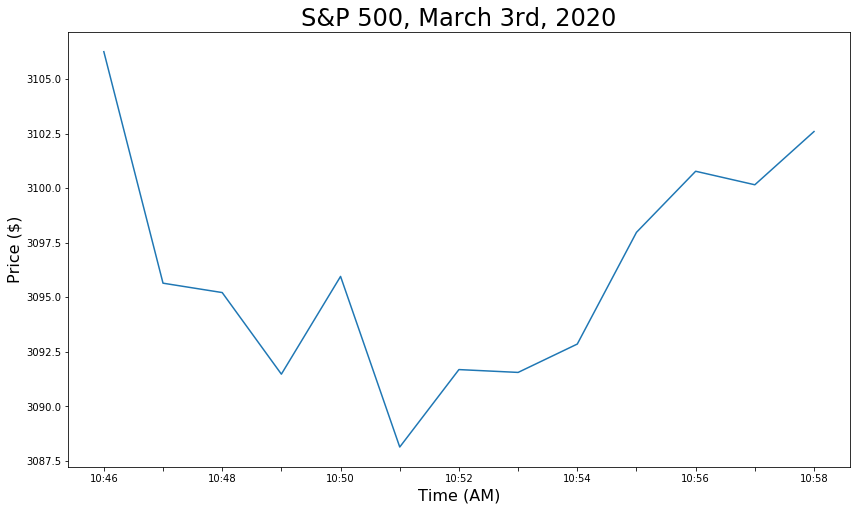

In [279]:
import matplotlib.pyplot as plt
plt.plot(times,stock_prices)
my_xticks = ['10:46','','10:48','','10:50','','10:52','','10:54','','10:56','','10:58','',]
plt.xticks(times, my_xticks)
plt.title("S&P 500, March 3rd, 2020", fontsize=24)
plt.xlabel("Time (AM)", fontsize=16)
plt.ylabel("Price ($)", fontsize=16)

fig = plt.gcf()
fig.set_size_inches(14, 8)

In [227]:
pre_tweet_vol = 0
pre_tweet_vols = []
post_tweet_vol = 0
post_tweet_vols = []
pct_changes = []
for index, row in df_MVI.iterrows():
    for column in df_columns[0:6]:
        pre_tweet_vol = row[column] + pre_tweet_vol
        
    pre_tweet_vols.append(pre_tweet_vol)
    pre_tweet_vol = 0
    
for index, row in df_MVI.iterrows():
    for column in df_columns[7:13]:
        post_tweet_vol = row[column] + post_tweet_vol
        
    post_tweet_vols.append(post_tweet_vol)
    post_tweet_vol = 0
    
for pre, post in zip(pre_tweet_vols,post_tweet_vols):
    pct_change = (post - pre)
    pct_changes.append(pct_change)

In [228]:
df_MVI['Tweet'].shape

(2375,)

In [231]:
pre_post_vol = pd.DataFrame({'Pre_Tweet_Vol' : pre_tweet_vols,
               'Post_Tweet_Vol' : post_tweet_vols,
               'Vol Change' : pct_changes,
               'Tweet': df_MVI['Tweet'],
               'Tweet Time': df_MVI['Tweet Time'] })
pre_post_vol = pre_post_vol.dropna()
pre_post_vol = pre_post_vol.sort_values(by=['Vol Change'], ascending = False)
pre_post_vol

,Pre_Tweet_Vol,Post_Tweet_Vol,Vol Change,Tweet,Tweet Time
551,-0.010892,0.001412,0.012304,Just had a very good tele-conference with Nat...,20200316 1332
915,-0.008380,0.003885,0.012264,The Federal Reserve is cutting but must furthe...,20200303 1051
465,0.008989,0.018959,0.009970,Thank you @HerschelWalker! https://t.co/qBXOa4...,20200318 1550
7269,-0.007727,0.001513,0.009240,Today we honor all of our Country’s Purple Hea...,20190807 0946
1031,-0.005200,0.003462,0.008661,“You go around Pennsylvania and you see Trump ...,20200228 1030
...,...,...,...,...,...
717,0.008702,-0.000290,-0.008992,Thank you @SenateGOP! https://t.co/XysOvXbTMF,20200310 1144
839,0.006164,-0.003560,-0.009724,Gallup just gave us the highest rating ever fo...,20200305 1534
10724,0.007377,-0.002386,-0.009762,The reason the DACA for Wall deal didn’t get d...,20181227 1444
649,0.027447,0.003998,-0.023449,KEEPING THE HOME SAFE ENCOURAGE YOUR FAMILY ME...,20200312 1301


In [230]:
# median_vols = {}
# for x in range(0,11):
#     median_vol = df_MVI_abs.median(axis = 0)[x]
#     median_vols.update{x:median_vol}
    
pre_post_vol.to_csv("PRE_POST_VOL")

In [30]:
df_MVI_abs.median(axis = 0)

Vol -5 Mins Before Tweet    0.000137
Vol -4 Mins Before Tweet    0.000129
Vol -3 Mins Before Tweet    0.000133
Vol -2 Mins Before Tweet    0.000123
Vol -1 Mins Before Tweet    0.000130
Vol @ Tweet                 0.000130
Vol 1 Mins After Tweet      0.000124
Vol 2 Mins After Tweet      0.000121
Vol 3 Mins After Tweet      0.000129
Vol 4 Mins After Tweet      0.000131
Vol 5 Mins After Tweet      0.000138
Vol 6 Mins After Tweet      0.000127
dtype: float64

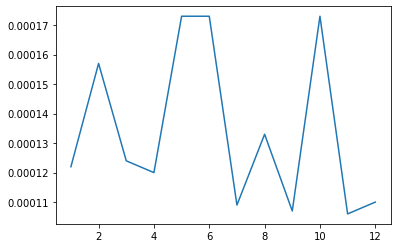

In [208]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0.000122, 0.000157, 0.000124, 0.000120, 0.000173, 0.000173, 0.000109, 0.000133, 0.000107, 0.000173, 0.000106, 0.000110])

In [31]:
df_MVI.sort_values(by='Vol 4 Mins After Tweet', ascending=False)

,Vol -5 Mins Before Tweet,Vol -4 Mins Before Tweet,Vol -3 Mins Before Tweet,Vol -2 Mins Before Tweet,Vol -1 Mins Before Tweet,Vol @ Tweet,Vol 1 Mins After Tweet,Vol 2 Mins After Tweet,Vol 3 Mins After Tweet,Vol 4 Mins After Tweet,Vol 5 Mins After Tweet,Vol 6 Mins After Tweet,Tweets
263,0.008121,0.005182,0.000350,0.004027,0.009260,0.009260,0.000218,0.009849,0.001584,0.007553,0.004871,0.009898,NaN
264,0.008121,0.005182,0.000350,0.004027,0.009260,0.009260,0.000218,0.009849,0.001584,0.007553,0.004871,0.009898,NaN
181,0.002496,0.001908,0.001079,0.002228,0.007539,0.007539,0.000026,0.003568,0.001280,0.006656,0.002135,0.005367,Today is National #MedalofHonorDay. Join me in...
261,0.005182,0.000350,0.004027,0.009260,0.000218,0.000218,0.009849,0.001584,0.007553,0.004871,0.009898,0.002735,STRONG &amp; UNITED WE WILL PREVAIL! GOD BLESS...
262,0.005182,0.000350,0.004027,0.009260,0.000218,0.000218,0.009849,0.001584,0.007553,0.004871,0.009898,0.002735,https://t.co/AU2HE5cTTo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,0.000018,0.000043,0.000174,0.000092,0.000039,0.000039,0.000238,0.000014,0.000057,0.000000,0.000174,0.000103,NaN
8992,0.000203,0.000070,0.000018,0.000053,0.000060,0.000060,0.000060,0.000063,0.000137,0.000000,0.000011,0.000147,....agricultural products from our Great Farme...
9185,0.000004,0.000063,0.000019,0.000019,0.000052,0.000052,0.000007,0.000000,0.000108,0.000000,0.000030,0.000004,NaN
9490,0.000108,0.000062,0.000081,0.000015,0.000042,0.000042,0.000120,0.000305,0.000123,0.000000,0.000069,0.000039,Congratulations to @TigerWoods. a truly Great ...


In [38]:
len(vol_sub_43_list)

11322

In [43]:
Moving_Volatility_Index

{'Vol -5 Mins Before Tweet': [0.0014819016397240436,
  -0.0012576640550980404,
  0.0006663987855638192,
  -0.0005010222574845985,
  0.00035467567699721804,
  -0.00025415677575558055,
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  0.00041472431397267316,
  0.0009145171072867401,
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  -0.0008544112002384455,
  0.0005467697816436023,
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  0.0006919144853308378,
  -0.00031066151736182314,
  -0.0003375488614841741,
  0.0013700814021817653,
  0.00014978655444043053,
  0.00103474482003119,
  -0.0016120420324374429,
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',
  -0.00027833328111571997,
  1.5349253067502207e-05,
  -0.0007057857365588468,
  -0.00013096921086649442,
  'No SPX data avail.',
  'No SPX data avail.',
  'No SPX data avail.',

In [44]:
tweet_df.shape

(16715, 7)

In [45]:
len(t_list_plus_6)

11322

In [46]:
df_MVI.shape

(2309, 13)